**Q-Q** plots steand for **quantile-quantile** plots. They are used to see how closely numeric data follows some hypothetical distribution.

# Import Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

%config InlineBackend.figure_format = 'retina'

# Import Dataset

In [84]:
df = pd.read_csv('fuel-econ.csv')

In [85]:
df.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


# Distribution Estimation

The follow code will plot a histogram of the `co2` column and will draw a line for the estimated distribution of the data (relative the the normal distribution). `np.linspace()` generates x values along the given range.

''

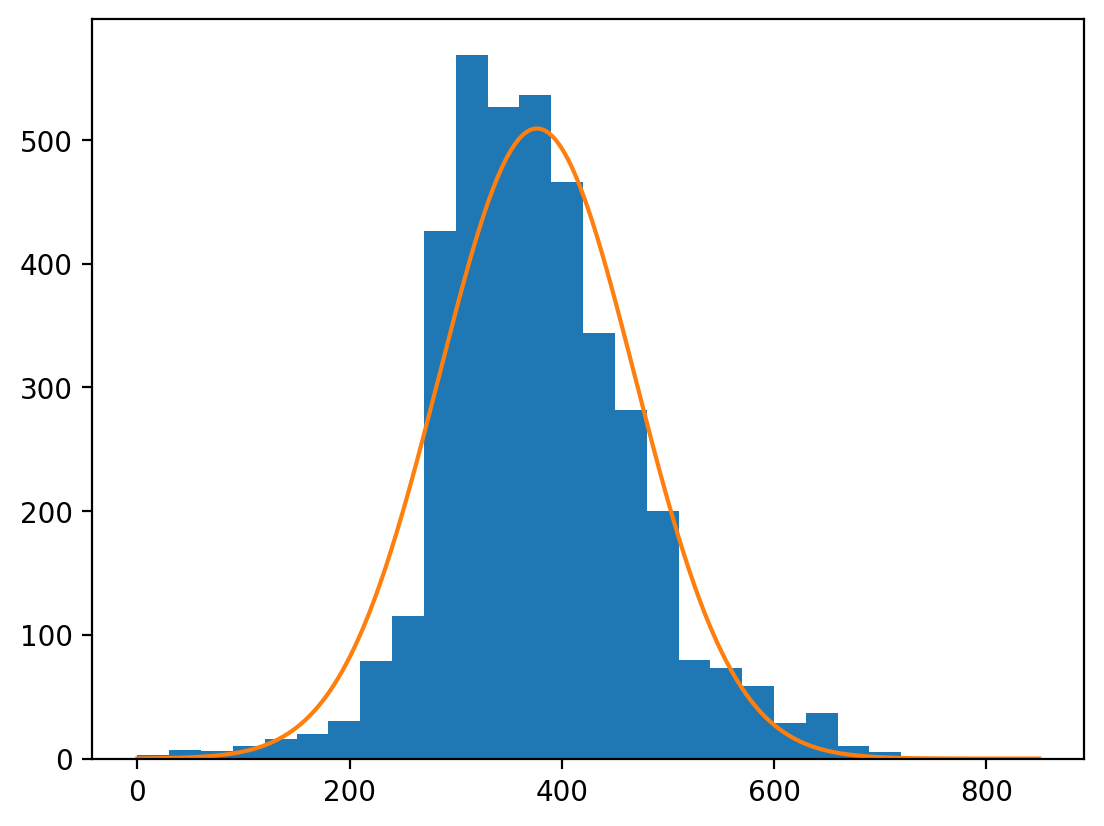

In [86]:
# Plots the histogram
bin_size = 30
bin_edges = np.arange(0, 800 + bin_size, bin_size)
plt.hist(data=df, x='co2',bins=bin_edges);


# Overlay a theoretical normal distribution on top (Plotting the distribution line)
samp_mean = df['co2'].mean()
samp_sd = df['co2'].std()

x = np.linspace(0, 850, 2000)#Start, Stop, how curved the line should be (how many numbers it will generate in that range)
# It matche sthe bin_edeges limits

y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
#pdf stands for probability density function, returns normal distribution height density at each value.

y *= df.shape[0]*  bin_size # scale the distribution height by number of points and bin size

#The values returned by the pdf all equate to 1, so they must be scaled properly to be visualized alongside the histogram.

plt.plot(x, y)
;

The true data shows there is a bit of a spike towards the middle and the tails don't line up perfectly with the distribution. The question that should now be asked is, is there enough evidence from what can be observed to say the data is significantly different from the expected normal distribution.

This can be checked by using scipy's `shapiro` function which performs the **Shaprio-Wilk** test.

This can also be done visually using the Q-Q plot. The main idea of the Q-Q plot is to find patterns that would usually appear in a normally distributed plot in terms of how far the data is from the mean of the distribution. Has something to do with kth rank and numpy's `ppf()` function.

''

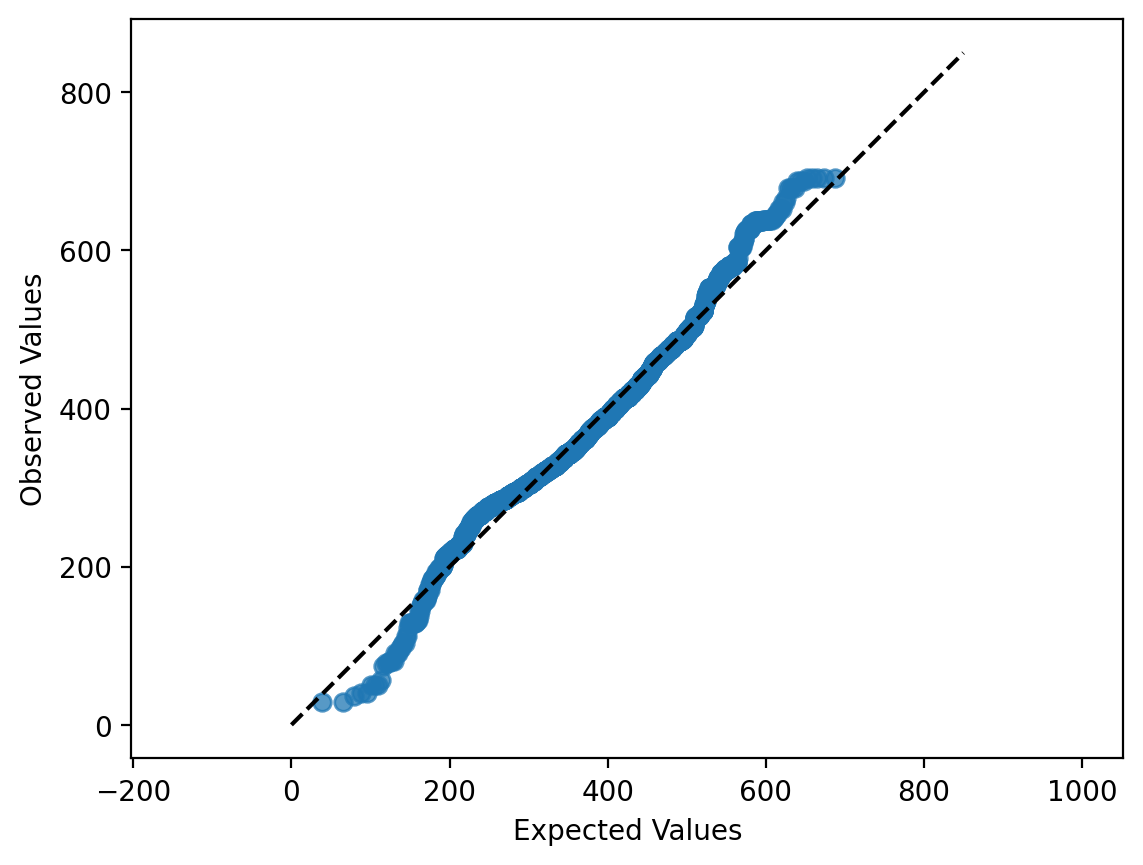

In [87]:
n_points = df.shape[0]
qs = (np.arange(n_points) - .5) / n_points
expected_vals = norm.ppf(qs, samp_mean, samp_sd)

plt.scatter(expected_vals, df['co2'].sort_values(),s=40,alpha=0.75)
plt.plot([0,850],[0,850],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values')
;

The dotted x=y line is to see where the points should be when the observed data matches the expected data. The `plt.axis('equal')` lmakes sure the axis scaling is equal to make the diagnal line 45 degrees.

Usually the Q-Q plot is rendered in units of standardized units (standard deviation units). The following code converts the graph to be in those units.

''

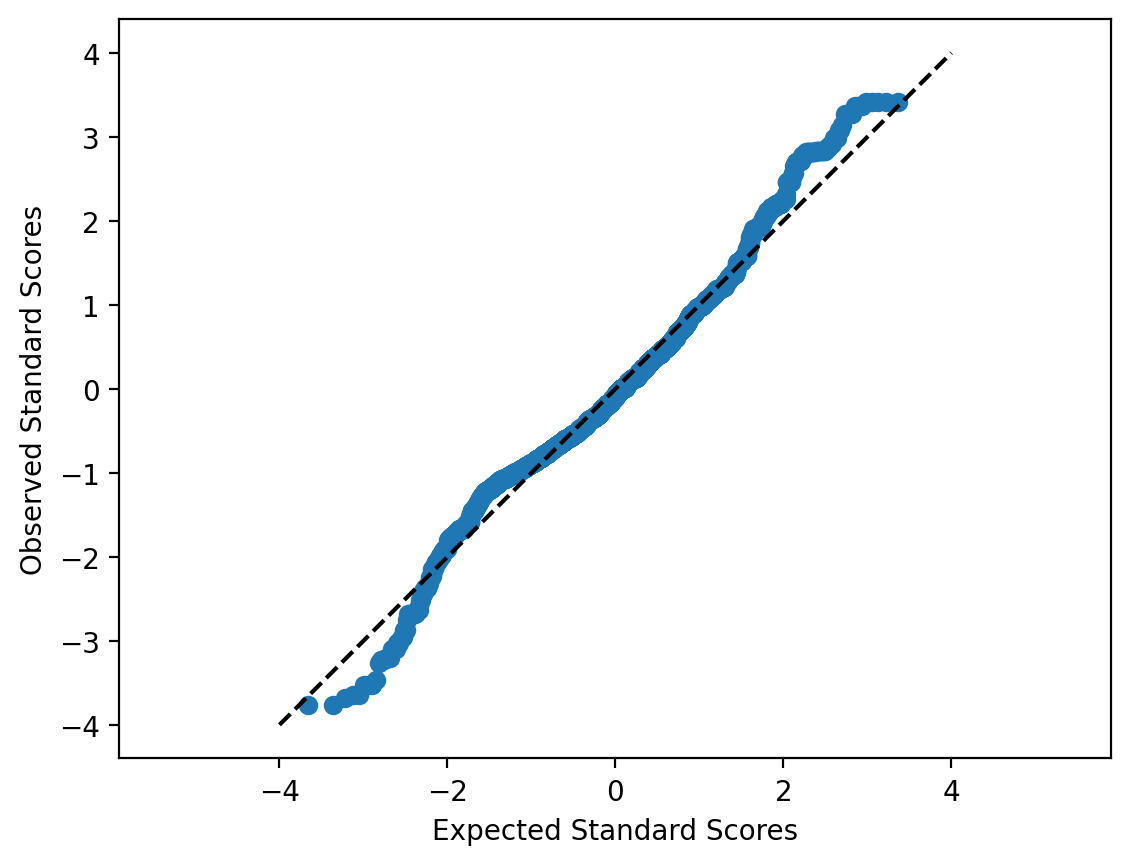

In [88]:
expected_scores = norm.ppf(qs)
data_scores = (df['co2'].sort_values() - samp_mean) / samp_sd

plt.scatter(expected_scores, data_scores)
plt.plot([-4,4],[-4,4],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores')
;

An example of Q-Q plot on data that does not fir normal distribution

''

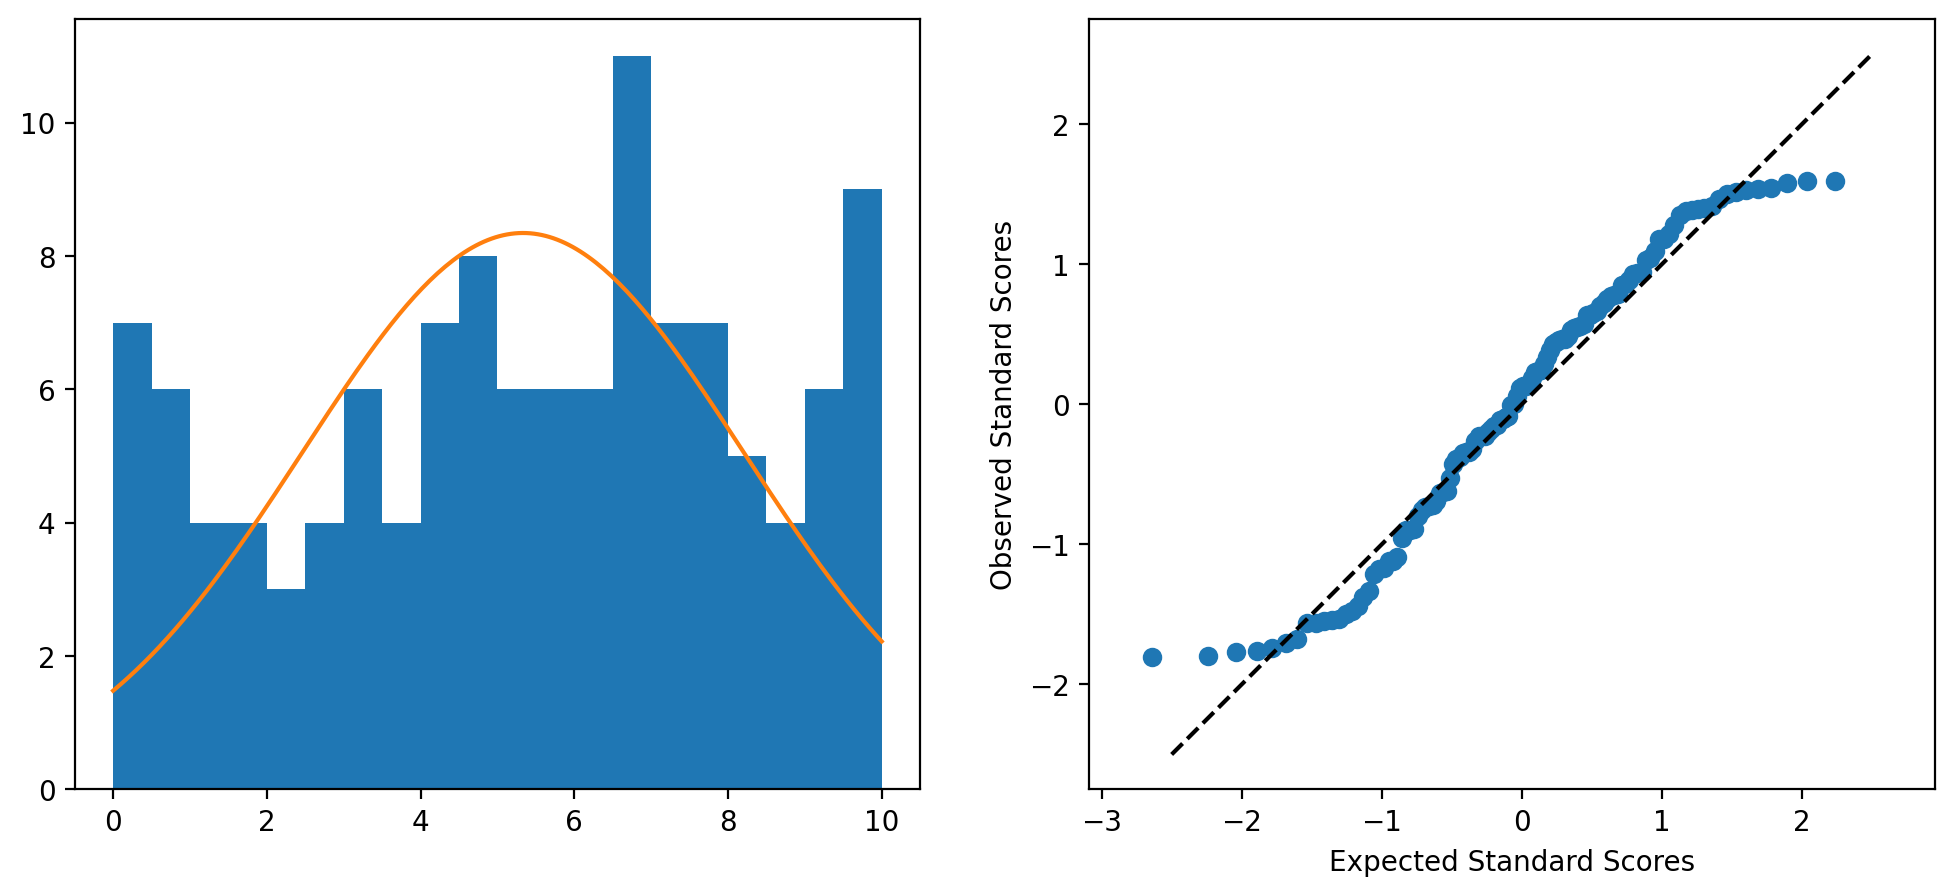

In [89]:
# generate the data
np.random.seed(8322489)

n_points = 120
unif_data = np.random.uniform(0, 10, n_points)

# set up the figure
plt.figure(figsize = [12, 5])

# left subplot: plot the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(0, 10 + bin_size, bin_size)
plt.hist(x=unif_data, bins=bin_edges);

# overlay a theoretical normal distribution on top
samp_mean = unif_data.mean()
samp_sd = unif_data.std()

from scipy.stats import norm
x = np.linspace(0, 10, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= n_points*  bin_size # scale the distribution height
plt.plot(x, y)

# right subplot: create a Q-Q plot
plt.subplot(1, 2, 2)

qs = (np.arange(n_points) - .5) / n_points
expected_scores = norm.ppf(qs)
data_scores = (np.sort(unif_data) - samp_mean) / samp_sd

plt.scatter(expected_scores, data_scores)
plt.plot([-2.5,2.5],[-2.5,2.5],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores')
;